In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [92]:
gpu_data = pd.read_csv('gpu.csv', index_col=0);gpu_data

,benchmark,env,num_access,time
0,l1v_read,gpu,0,0.000003
1,l1v_read,gpu,0,0.000004
2,l1v_read,gpu,0,0.000003
3,l1v_read,gpu,0,0.000003
4,l1v_read,gpu,0,0.000003
5,l1v_read,gpu,1,0.000003
6,l1v_read,gpu,1,0.000003
7,l1v_read,gpu,1,0.000003
8,l1v_read,gpu,1,0.000003
9,l1v_read,gpu,1,0.000016


(2e-06, 3e-05)

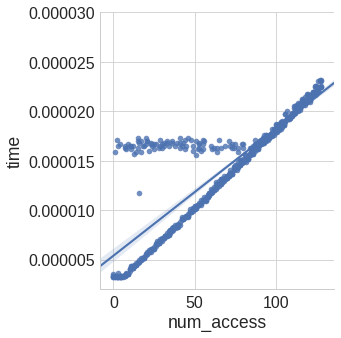

In [93]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(2e-6, 3e-5)

(2e-06, 3e-05)

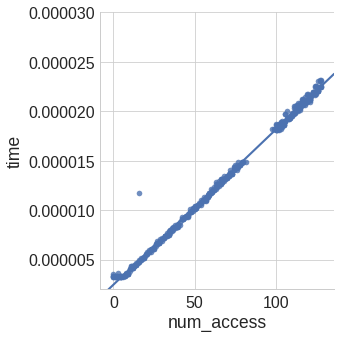

In [94]:
filtered_gpu_data = gpu_data[(gpu_data['time']<0.000015) | (gpu_data['time']>0.000018)]
lm2 = sns.lmplot('num_access', 'time', filtered_gpu_data)
lm2.axes[0, 0].set_ylim(2e-6, 3e-5)

In [95]:
result = sm.ols(formula="time ~ num_access", data=filtered_gpu_data).fit()
result.params

Intercept     2.447457e-06
num_access    1.568732e-07
dtype: float64

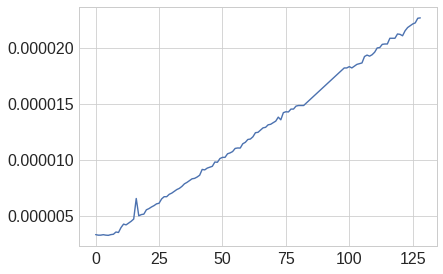

In [96]:
agg_data = filtered_gpu_data.groupby(['benchmark', 'env', 'num_access']).agg(np.mean).reset_index(); agg_data
plt.plot(agg_data['num_access'], agg_data['time'])

### Conclusion
Each l1 hit takes 150 cycle?

In [97]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [98]:
full_data = gpu_data.append(sim_data, ignore_index=True)

(2e-06, 3e-05)

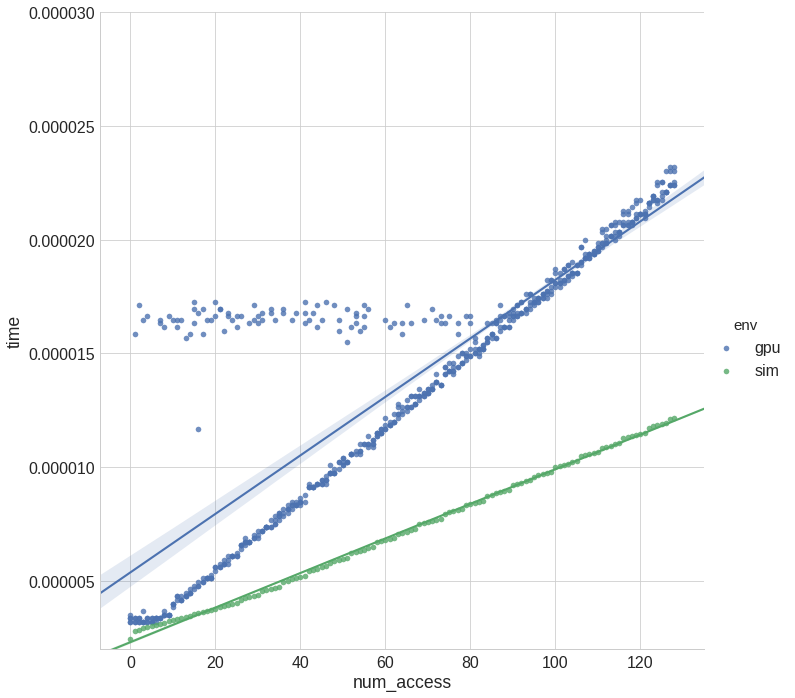

In [99]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env', size=10)
lm3.axes[0, 0].set_ylim(2e-6, 3e-5)

### Conclusion

Simulation result has a good starting point estimation. But L1 hit is seriously under-estimated. Or the L1 is not really used in this case?